In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType

# Define schema for application_df
application_schema = StructType([
    StructField("ID", IntegerType(), True),
    StructField("CODE_GENDER", StringType(), True),
    StructField("FLAG_OWN_CAR", StringType(), True),
    StructField("FLAG_OWN_REALTY", StringType(), True),
    StructField("CNT_CHILDREN", IntegerType(), True),
    StructField("AMT_INCOME_TOTAL", DoubleType(), True),
    StructField("NAME_INCOME_TYPE", StringType(), True),
    StructField("NAME_EDUCATION_TYPE", StringType(), True),
    StructField("NAME_FAMILY_STATUS", StringType(), True),
    StructField("NAME_HOUSING_TYPE", StringType(), True),
    StructField("DAYS_BIRTH", IntegerType(), True),
    StructField("DAYS_EMPLOYED", IntegerType(), True),
    StructField("FLAG_MOBIL", IntegerType(), True),
    StructField("FLAG_WORK_PHONE", IntegerType(), True),
    StructField("FLAG_PHONE", IntegerType(), True),
    StructField("FLAG_EMAIL", IntegerType(), True),
    StructField("OCCUPATION_TYPE", StringType(), True),
    StructField("CNT_FAM_MEMBERS", DoubleType(), True)
])

# Define schema for credit_df
credit_schema = StructType([
    StructField("ID", IntegerType(), True),
    StructField("MONTHS_BALANCE", IntegerType(), True),
    StructField("STATUS", StringType(), True)
])

credit_df = (spark.read
              .option("header", True)
              .csv("dbfs:/FileStore/shared_uploads/ayushbajracharya09@gmail.com/credit_record.csv", schema=credit_schema))

application_df = (spark.read
              .option("header", True)
              .csv("dbfs:/FileStore/shared_uploads/ayushbajracharya09@gmail.com/application_record.csv", schema=application_schema))


# EDA

In [0]:
# Convert Spark DataFrame to Pandas DataFrame
application_pd = application_df.toPandas()

# Display the first few rows of the Pandas DataFrame
display(application_pd.head())

ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,null,2.0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,null,2.0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [0]:
# Convert Spark DataFrame to Pandas DataFrame
credit_pd = credit_df.toPandas()

# Display the first few rows of the Pandas DataFrame
display(credit_pd.head())


ID,MONTHS_BALANCE,STATUS
5001711,0,X
5001711,-1,0
5001711,-2,0
5001711,-3,0
5001712,0,C


In [0]:
application_pd['ID'].duplicated().sum()

Out[16]: 47

In [0]:
display(application_pd.isnull().sum())

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

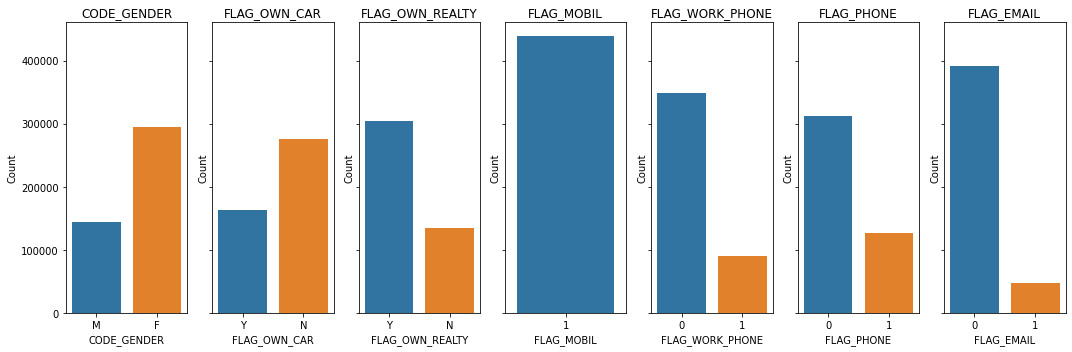

In [0]:
# List of categorical variables to plot
variables = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']

# Create subplots
fig, axes = plt.subplots(1, len(variables), figsize=(15, 5), sharey=True)

# Iterate through variables and create count plots
for i, var in enumerate(variables):
    sns.countplot(x=var, data=application_pd, ax=axes[i])
    axes[i].set_title(f"{var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


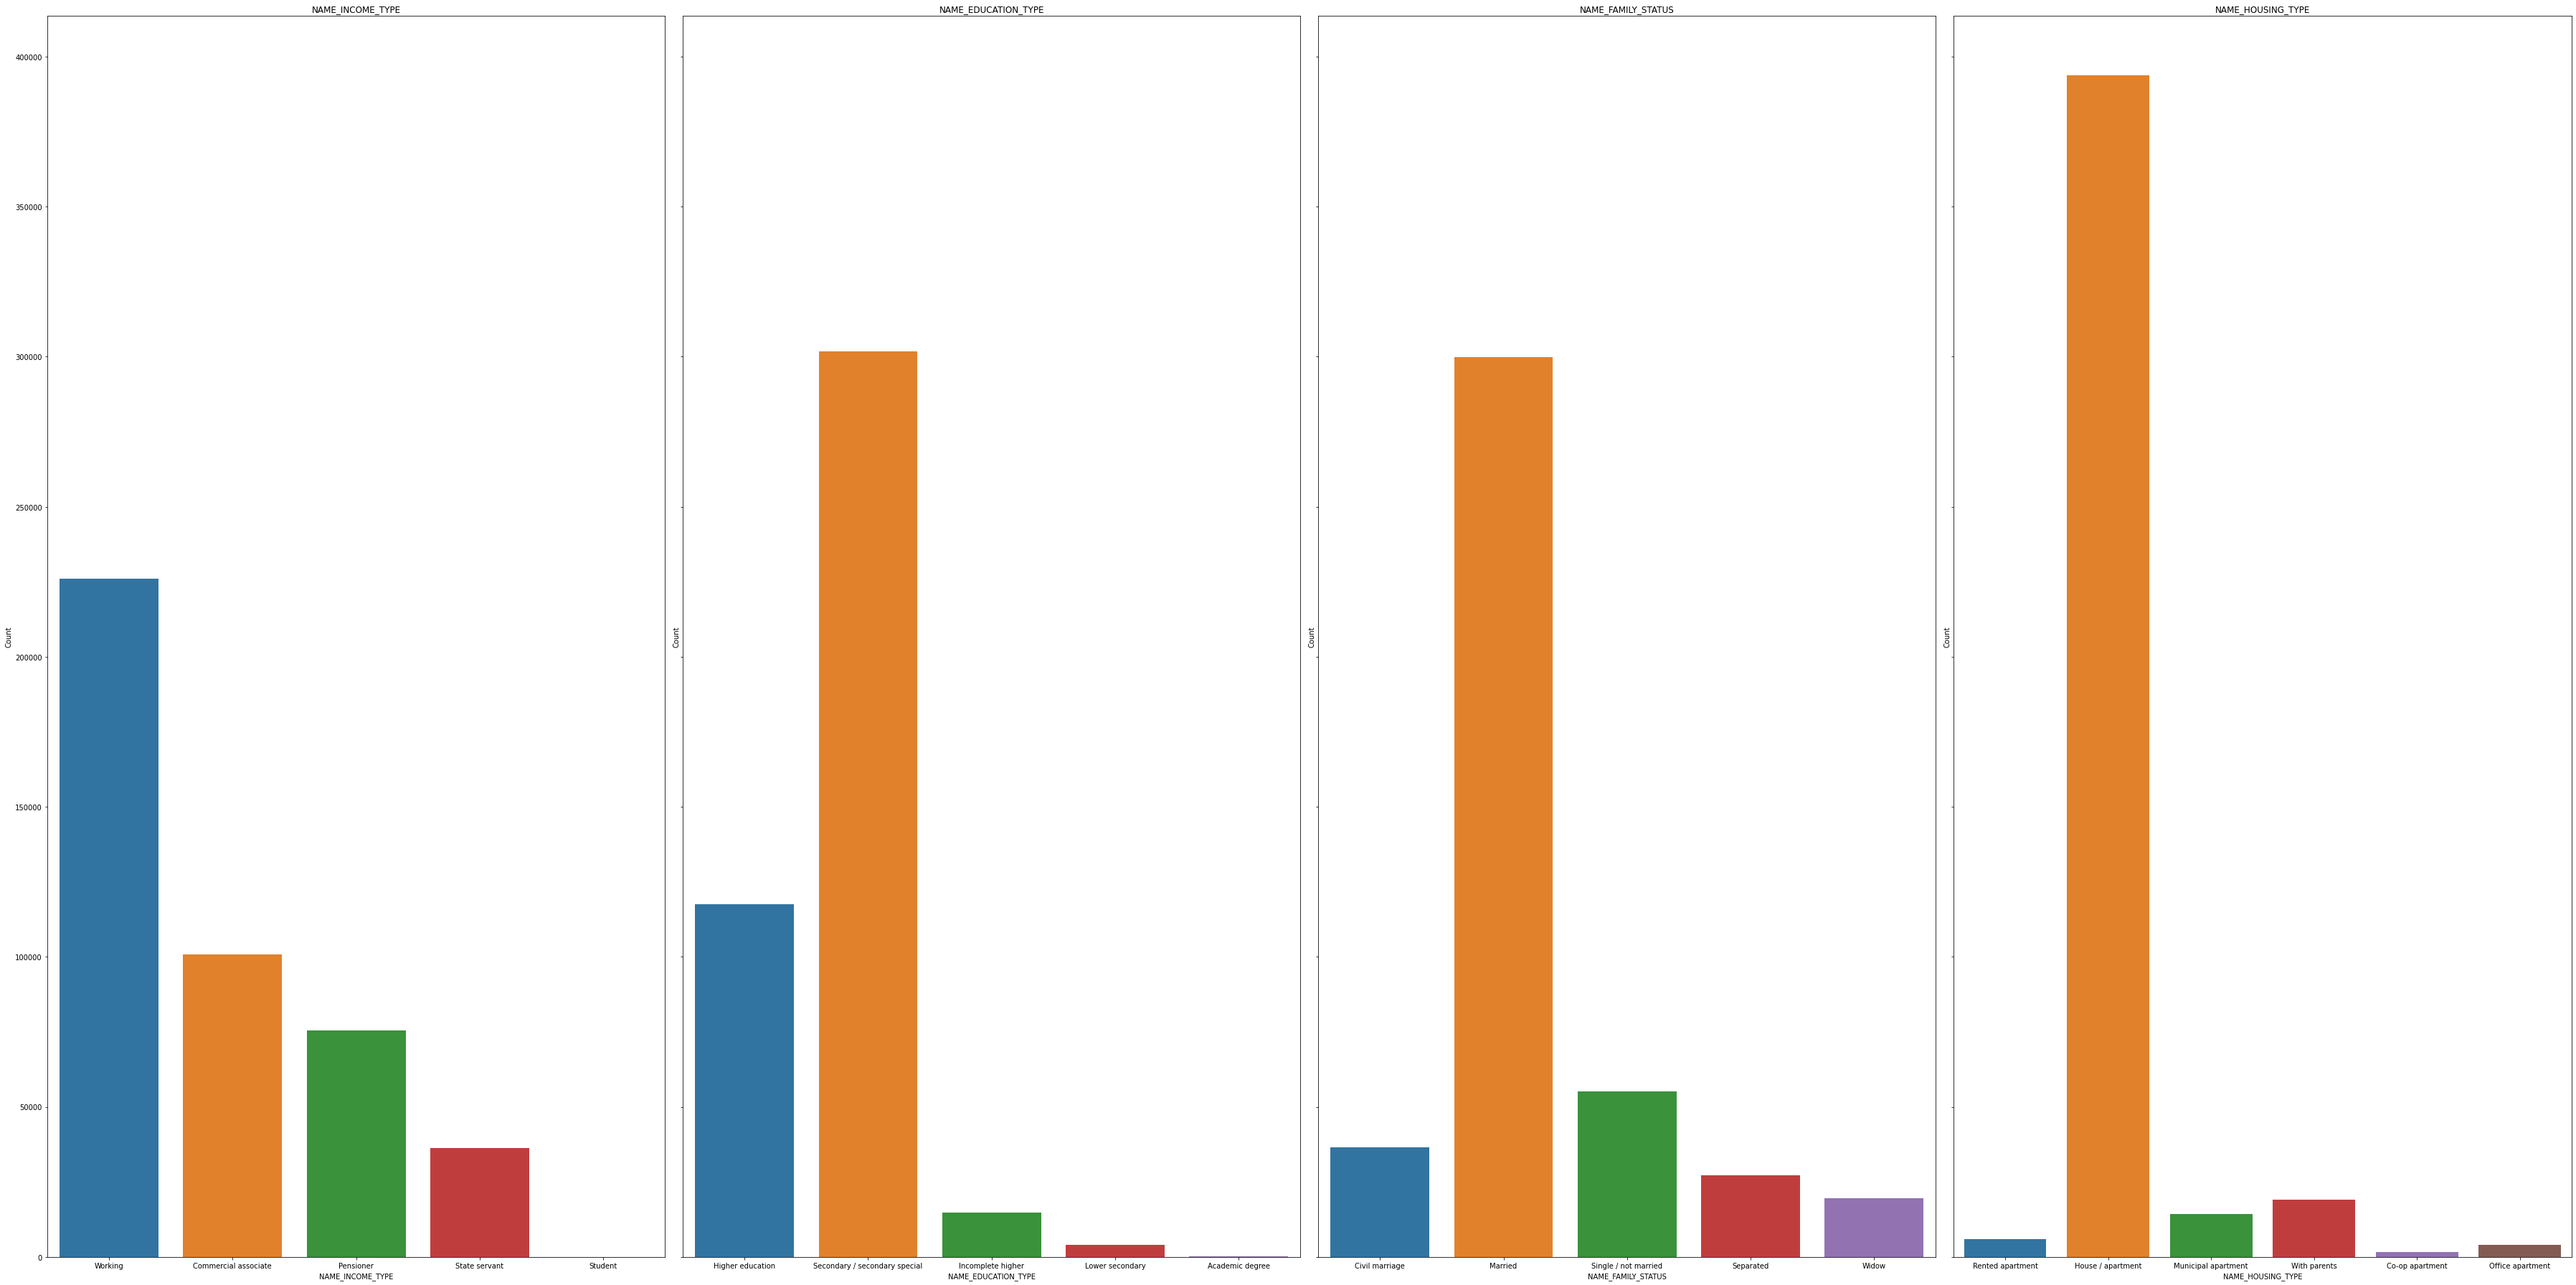

In [0]:
# List of categorical variables to plot
variables = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

# Create subplots
fig, axes = plt.subplots(1, len(variables), figsize=(50, 25), sharey=True)

# Iterate through variables and create count plots
for i, var in enumerate(variables):
    sns.countplot(x=var, data=application_pd, ax=axes[i])
    axes[i].set_title(f"{var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


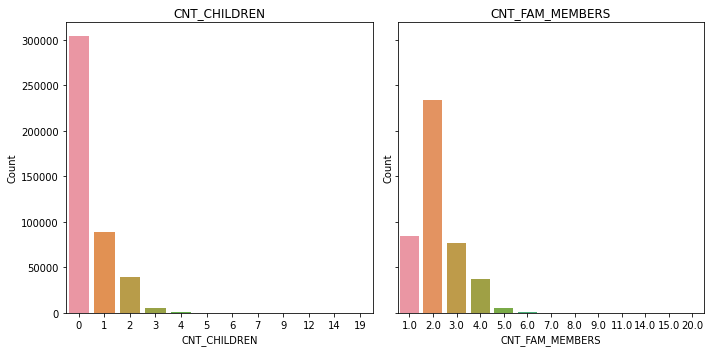

In [0]:
# List of categorical variables to plot
variables = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']

# Create subplots
fig, axes = plt.subplots(1, len(variables), figsize=(10, 5), sharey=True)

# Iterate through variables and create count plots
for i, var in enumerate(variables):
    sns.countplot(x=var, data=application_pd, ax=axes[i])
    axes[i].set_title(f"{var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [0]:
def identify_low_frequency_categories(column_name, threshold=50):
    """
    This function computes the frequency counts of categories in a specified column,
    and identifies the categories with frequency below the given threshold.

    Args:
    column_name (str): The column name for which to compute the frequency counts.
    threshold (int): The frequency threshold for categorizing low-frequency categories (default is 50).

    Returns:
    pandas.Index: Categories with frequencies below the threshold.
    """
    # Frequency counts
    category_counts = application_pd[column_name].value_counts()
    
    # Print the frequency counts (optional)
    print(f"Frequency counts for '{column_name}':")
    print(category_counts)
    
    # Identify categories with frequency below the threshold
    outliers = category_counts[category_counts < threshold].index
    
    # Print the outlier categories
    print(f"\n number of outlier categories (frequency < {threshold}): {len(outliers)}")
    
    return outliers


In [0]:
identify_low_frequency_categories('CNT_CHILDREN', 10)


Frequency counts for 'CNT_CHILDREN':
0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

 number of outlier categories (frequency < 10): 6
Out[60]: Int64Index([7, 9, 12, 6, 14, 19], dtype='int64')

In [0]:
identify_low_frequency_categories('CNT_FAM_MEMBERS')

Frequency counts for 'CNT_FAM_MEMBERS':
2.0     233891
1.0      84492
3.0      77128
4.0      37356
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
14.0         4
8.0          4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

 number of outlier categories (frequency < 50): 6
Out[62]: Float64Index([9.0, 11.0, 14.0, 8.0, 15.0, 20.0], dtype='float64')

In [0]:
identify_low_frequency_categories('AMT_INCOME_TOTAL', 100)

Frequency counts for 'AMT_INCOME_TOTAL':
135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
151425.0        1
133461.0        1
265950.0        1
201150.0        1
36679.5         1
Name: AMT_INCOME_TOTAL, Length: 866, dtype: int64

 number of outlier categories (frequency < 100): 757
Out[63]: Float64Index([ 96750.0, 517500.0, 355500.0,  78750.0, 128250.0, 173250.0,
               51750.0, 364500.0, 177750.0, 400500.0,
              ...
              237150.0, 144904.5, 123916.5, 234900.0,  32139.0, 151425.0,
              133461.0, 265950.0, 201150.0,  36679.5],
             dtype='float64', length=757)